<a href="https://colab.research.google.com/github/torifinch/VehicleClassificationProject/blob/main/VehicleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vehicle Classification Project
###Masterschool DA Course SEP24 - 108.3 Supervised Machine Learning Vehicle Classification Project
Author: Victoria Finch

Date: 21.03.2025

### Problem Description:
A chain of car repair shops called “Prospect Auto” asked you for a model that would differentiate all 3 vehicles (car, bus, and van) based on the silhouette.

Task: Create a Supervised Learning Multi-Class Classification Model that predicts a vehicle class.

Dataset Explaination:

Features in the dataset are for the three vehicles:
- a bus (which is a double decker bus)
- a van (which is a Cheverolet van)
- a car (either Saab 9000 or Opel Manta)

Features Breakdown:
- compactness -	How compact the shape is (low = elongated, high = compact).
- circularity	- How close the shape is to a perfect circle.
- distance_circularity	- Variation in distances from the center to the boundary.
- radius_ratio	- Ratio between the major and minor radii of the shape.
- pr.axis_aspect_ratio	- Ratio of the primary axis' length to its width.
- max.length_aspect_ratio	- Ratio of max length to width.
- scatter_ratio	- Measures how much the shape spreads out.
- elongatedness	- How stretched the shape is.
- pr.axis_rectangularity	- How rectangular the shape is along the principal axis.
- max.length_rectangularity	- Maximum rectangular fit for the object.
- scaled_variance, scaled_variance.1	- Normalized variance of pixel distribution.
- scaled_radius_of_gyration, scaled_radius_of_gyration.1	- Measure of mass distribution around the center.
- skewness_about, skewness_about.1, skewness_about.2 -	Asymmetry of shape in different axes.
- hollows_ratio -	Ratio of hollow (empty) areas inside the shape.
- class	- Target variable (Car, Bus, or Van).

## Import Data and Libraries


In [ ]:
#EDA
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

##Data Preparation
Connecting CSV file

In [ ]:
#Data Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Data
df_vehicle = pd.read_csv('/content/drive/MyDrive/Datasets/vehicle.csv')
df_vehicle.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


##Exploratory Data Analysis

###Data Assessment

In [ ]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
df_vehicle.shape

(846, 19)

In [ ]:
df_vehicle.describe().round(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.00,841.00,842.00,840.00,844.00,846.00,845.00,845.00,843.00,846.00,843.00,844.00,844.00,842.00,840.00,845.00,845.00,846.00
mean,93.68,44.83,82.11,168.89,61.68,8.57,168.90,40.93,20.58,148.00,188.63,439.49,174.71,72.45,6.36,12.60,188.92,195.63
std,8.23,6.15,15.78,33.52,7.89,4.60,33.21,7.82,2.59,14.52,31.41,176.67,32.58,7.49,4.92,8.94,6.16,7.44
min,73.00,33.00,40.00,104.00,47.00,2.00,112.00,26.00,17.00,118.00,130.00,184.00,109.00,59.00,0.00,0.00,176.00,181.00
25%,87.00,40.00,70.00,141.00,57.00,7.00,147.00,33.00,19.00,137.00,167.00,318.00,149.00,67.00,2.00,5.00,184.00,190.25
50%,93.00,44.00,80.00,167.00,61.00,8.00,157.00,43.00,20.00,146.00,179.00,363.50,173.50,71.50,6.00,11.00,188.00,197.00
75%,100.00,49.00,98.00,195.00,65.00,10.00,198.00,46.00,23.00,159.00,217.00,587.00,198.00,75.00,9.00,19.00,193.00,201.00
max,119.00,59.00,112.00,333.00,138.00,55.00,265.00,61.00,29.00,188.00,320.00,1018.00,268.00,135.00,22.00,41.00,206.00,211.00


Creating a copy for cleaning and EDA

In [ ]:
df_vehicle_cleaned = df_vehicle.copy()

Updating the nulls to mean, separated by class

In [ ]:
df_vehicle_cleaned.isnull().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


Replaced nulls with the mean for each target category

In [ ]:
if df_vehicle_cleaned.isnull().sum().any():
  df_vehicle_cleaned.fillna(df_vehicle_cleaned.groupby('class').transform('mean'), inplace=True)

df_vehicle_cleaned.isnull().sum()

,0
compactness,0
circularity,0
distance_circularity,0
radius_ratio,0
pr.axis_aspect_ratio,0
max.length_aspect_ratio,0
scatter_ratio,0
elongatedness,0
pr.axis_rectangularity,0
max.length_rectangularity,0


In [ ]:
df_vehicle_cleaned.duplicated().sum()

np.int64(0)

##Feature Engineering

I've applied this to the new cleaned EDA data, as well as the original data to be used in the ML Model.
1. Combining Compactness, Circularity, Distance Circularity into a "Roundness Ratio", as they all relate to roundness.
2. Combining Radius Ratio, Scatter Ratio, and Elongatedness into a "Length-Width Ratio" to help differentiate buses (elongated) vs. cars (compact).
3. Combining pr.axis_rectangularity and max.length_rectangularity to create a "Rectangular Ratio" to determine whether a vehicle is more box-like (bus, van) or curved (car).
4. Creating a new "Vehicle Aspect Ratio" using pr.axis_aspect_ratio and max.length_aspect_ratio to compare vehicle shape differences.



In [ ]:
df_vehicle['roundness_ratio'] = (df_vehicle['compactness'] + df_vehicle['circularity'] + df_vehicle['distance_circularity']) / 3
df_vehicle['length_width_ratio'] = (df_vehicle['radius_ratio'] + df_vehicle['scatter_ratio'] + df_vehicle['elongatedness']) / 3
df_vehicle['rectangular_ratio'] = (df_vehicle['pr.axis_rectangularity'] + df_vehicle['max.length_rectangularity']) / 2
df_vehicle['vehicle_aspect_ratio'] = (df_vehicle['pr.axis_aspect_ratio'] + df_vehicle['max.length_aspect_ratio']) / 2

In [ ]:
df_vehicle_cleaned['roundness_ratio'] = (df_vehicle_cleaned['compactness'] + df_vehicle_cleaned['circularity'] + df_vehicle_cleaned['distance_circularity']) / 3
df_vehicle_cleaned['length_width_ratio'] = (df_vehicle_cleaned['radius_ratio'] + df_vehicle_cleaned['scatter_ratio'] + df_vehicle_cleaned['elongatedness']) / 3
df_vehicle_cleaned['rectangular_ratio'] = (df_vehicle_cleaned['pr.axis_rectangularity'] + df_vehicle_cleaned['max.length_rectangularity']) / 2
df_vehicle_cleaned['vehicle_aspect_ratio'] = (df_vehicle_cleaned['pr.axis_aspect_ratio'] + df_vehicle_cleaned['max.length_aspect_ratio']) / 2

df_vehicle_cleaned.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,roundness_ratio,length_width_ratio,rectangular_ratio,vehicle_aspect_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,70.0,6.0,16.0,187.0,197,van,75.333333,127.333333,89.5,41.0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,72.0,9.0,14.0,189.0,199,van,72.000000,111.666667,81.0,33.0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,73.0,14.0,9.0,188.0,196,car,86.666667,149.333333,90.5,38.0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,63.0,6.0,10.0,199.0,207,van,72.000000,116.333333,81.0,36.0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,127.0,9.0,11.0,180.0,183,bus,66.333333,133.000000,81.5,77.5


In [ ]:
df_vehicle_cleaned['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

##Visualizations

Checking distribution of class

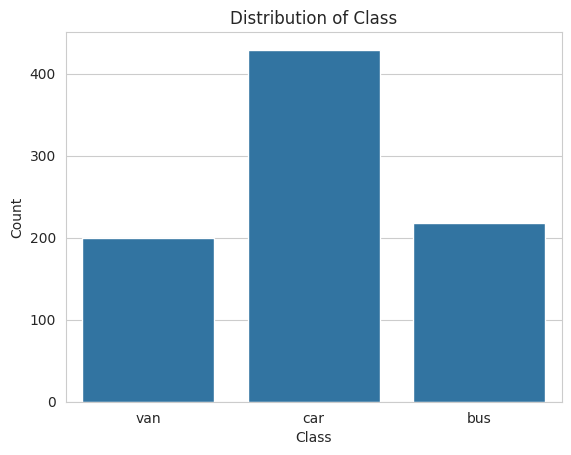

In [ ]:
sns.countplot(x=df_vehicle_cleaned['class'])
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Checking distribution of features

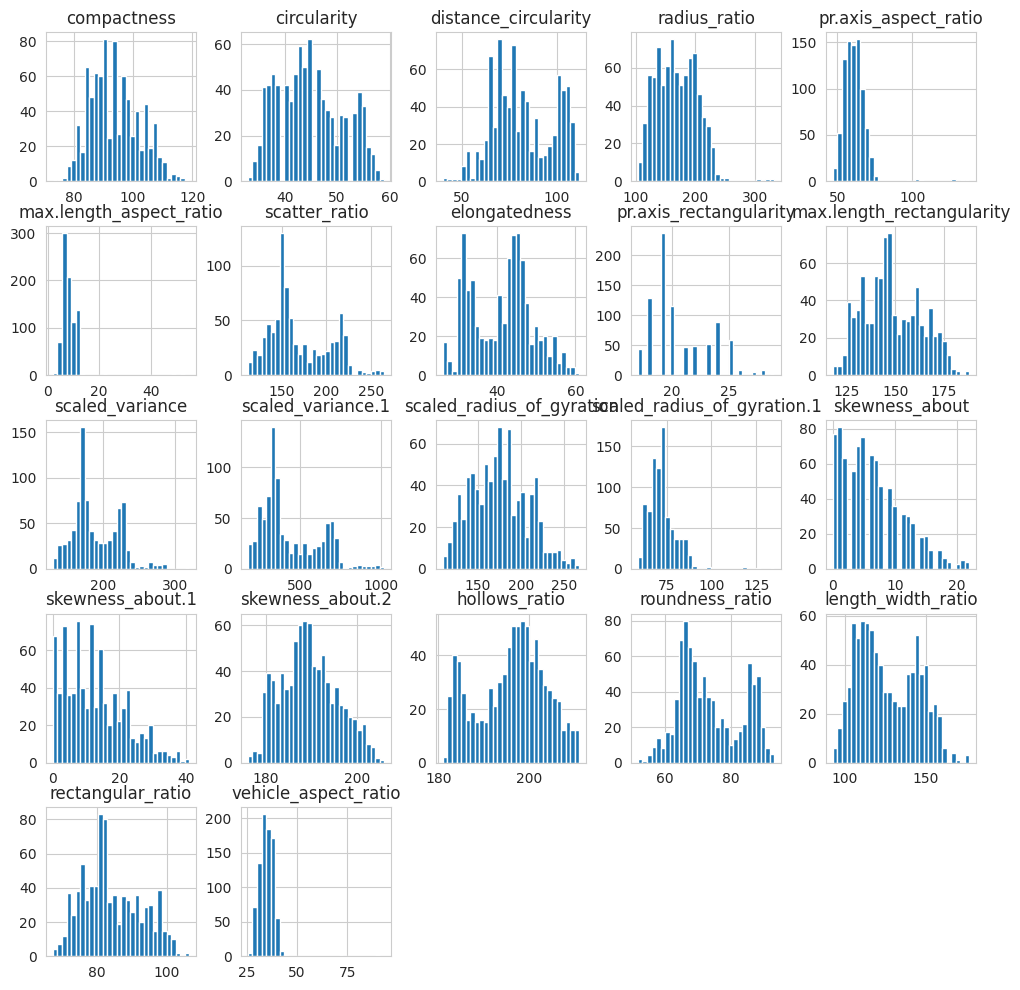

In [ ]:
df_vehicle_cleaned.hist(figsize=(12, 12), bins=30)
plt.show()

Correlation Matrix

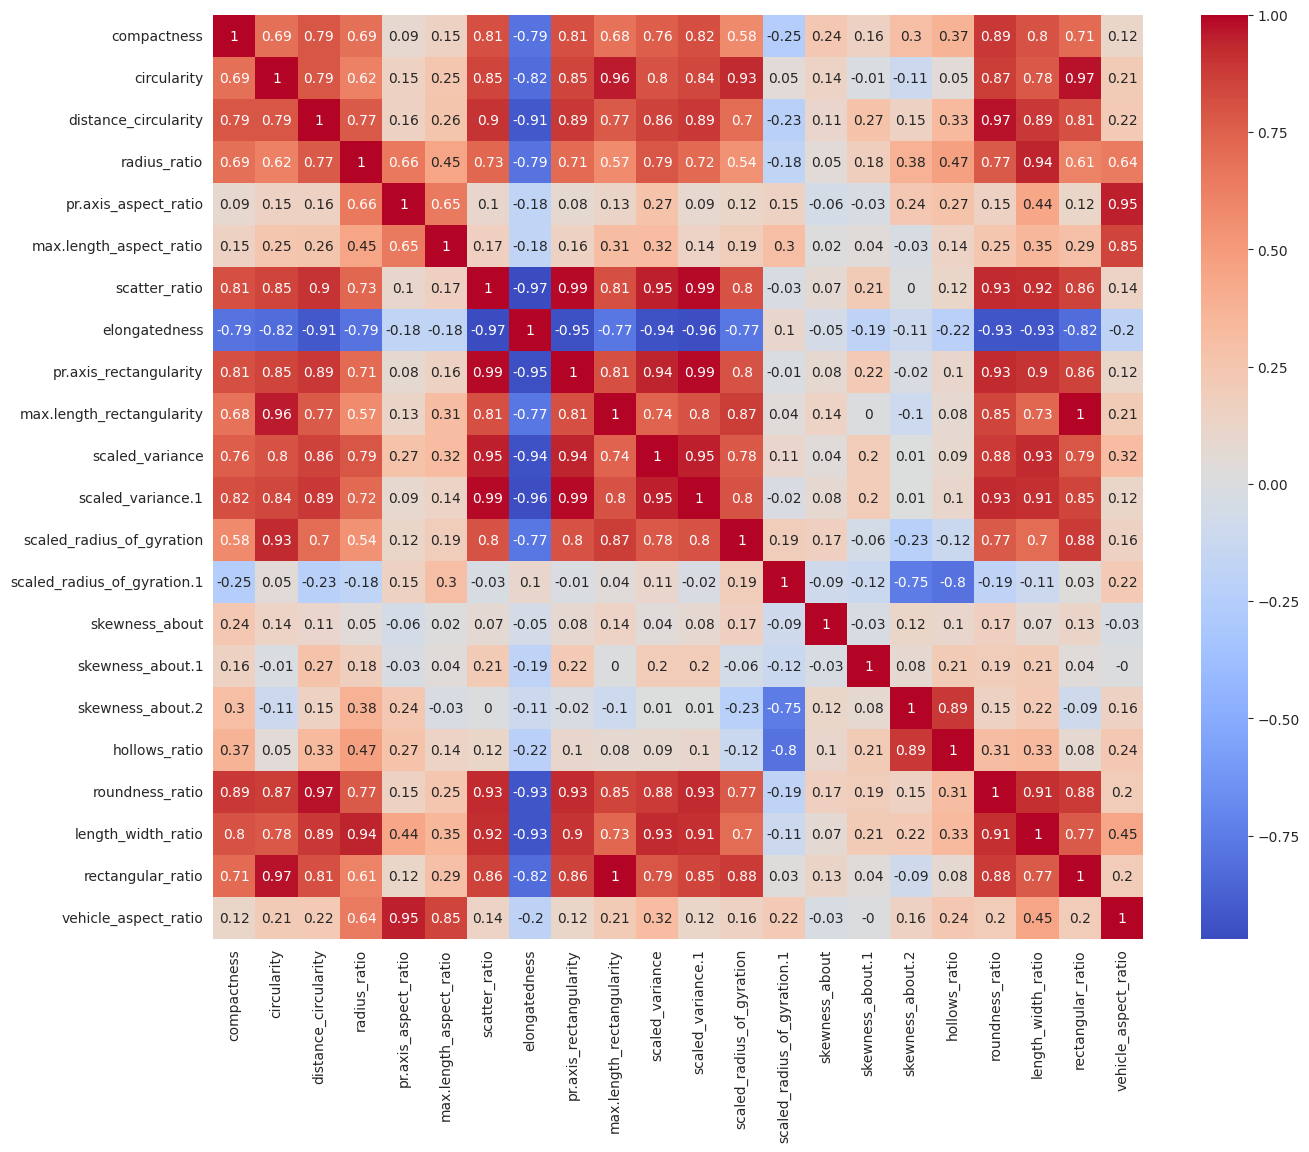

In [ ]:
# Correlation Matrix

vehicle_corr = df_vehicle_cleaned.corr(numeric_only=True).round(2)
plt.figure(figsize=(15, 12))
sns.heatmap(vehicle_corr, annot=True, cmap='coolwarm')
plt.show()

Avg elongatedness by class

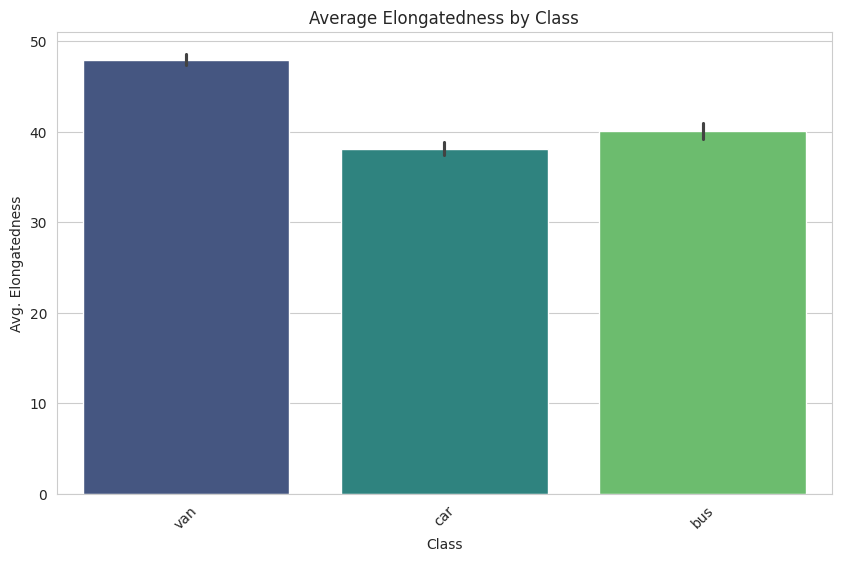

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='elongatedness', data=df_vehicle_cleaned, hue='class', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Avg. Elongatedness')
plt.title('Average Elongatedness by Class')
plt.show()

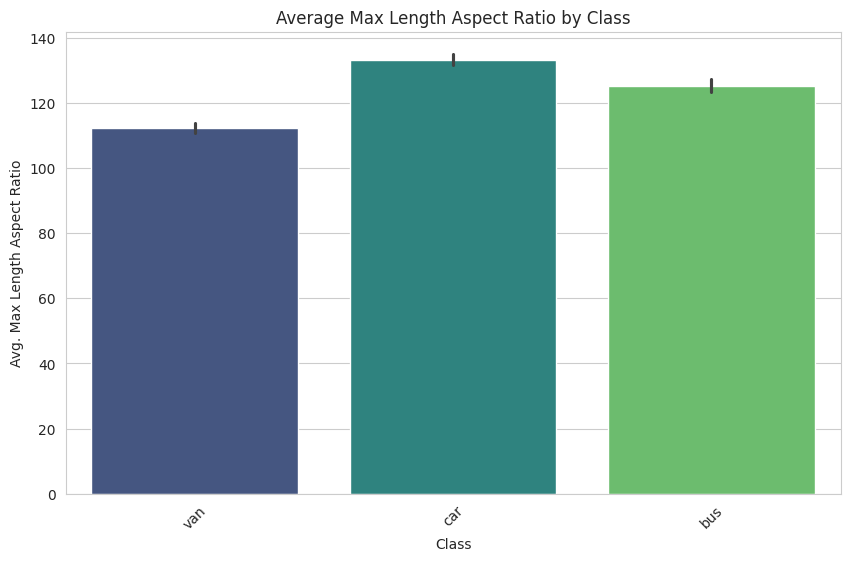

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='length_width_ratio', data=df_vehicle_cleaned, hue='class', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Avg. Max Length Aspect Ratio')
plt.title('Average Max Length Aspect Ratio by Class')
plt.show()

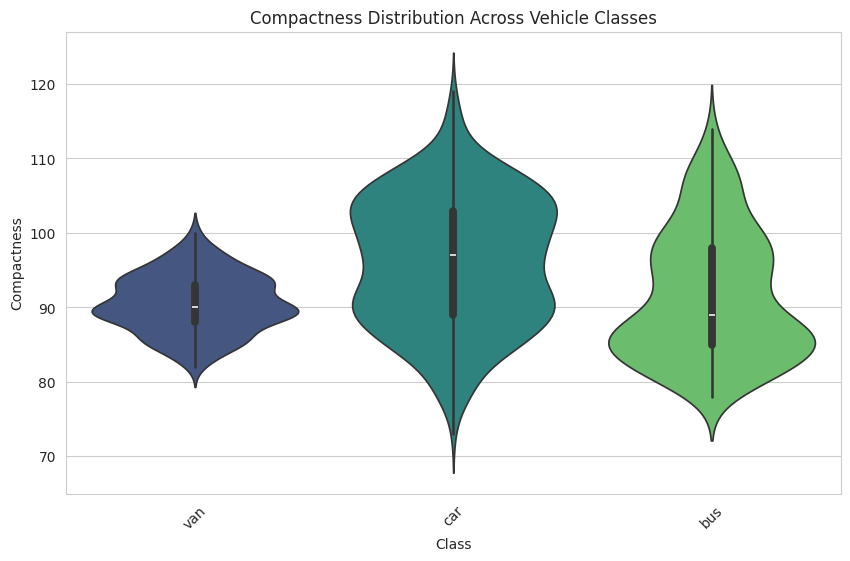

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="class", y="compactness", data=df_vehicle_cleaned, hue='class', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Compactness")
plt.title("Compactness Distribution Across Vehicle Classes")
plt.show()

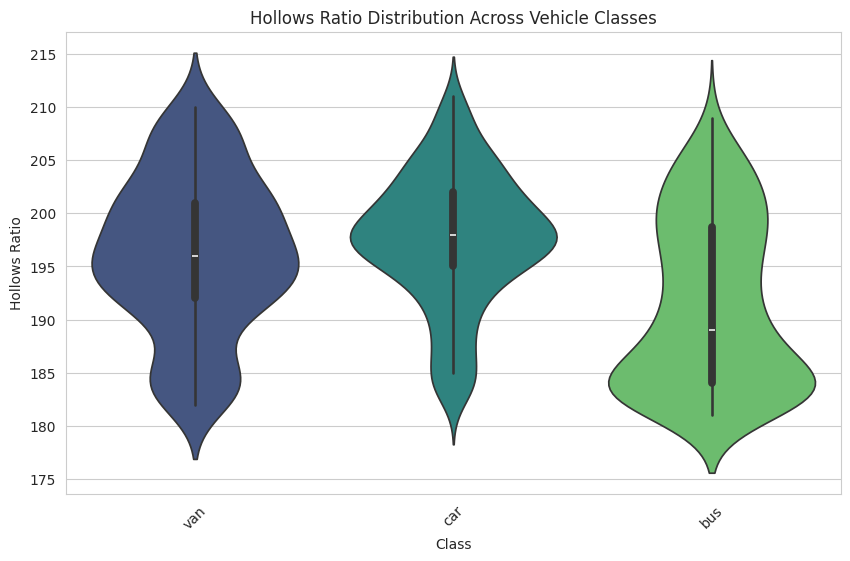

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="class", y="hollows_ratio", data=df_vehicle_cleaned, hue='class', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Hollows Ratio")
plt.title("Hollows Ratio Distribution Across Vehicle Classes")
plt.show()

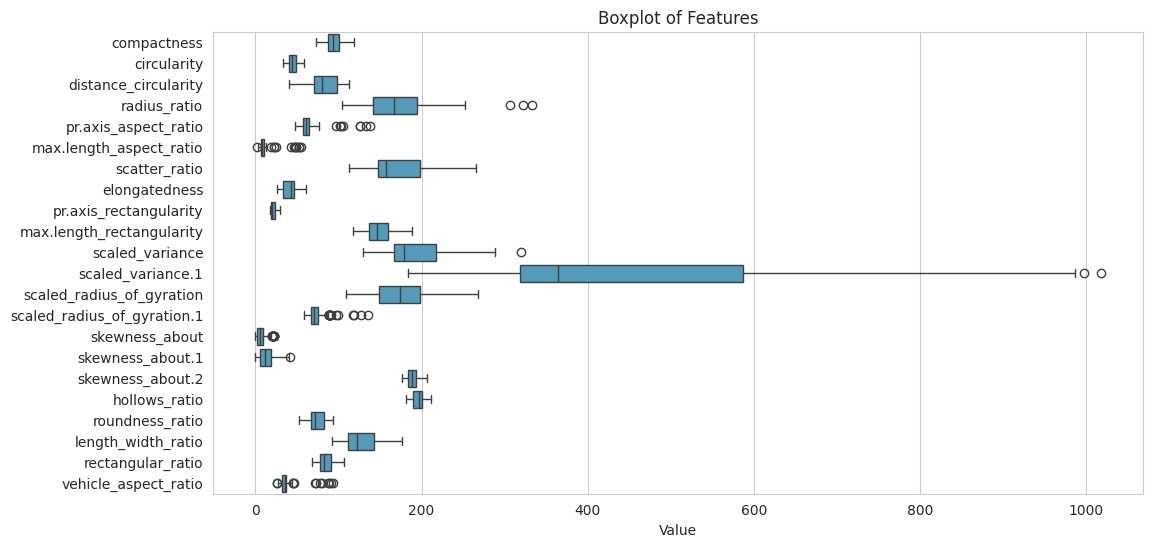

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_vehicle_cleaned, orient='h', color='#43a2ca')
plt.xlabel("Value")
plt.title("Boxplot of Features")
plt.show()

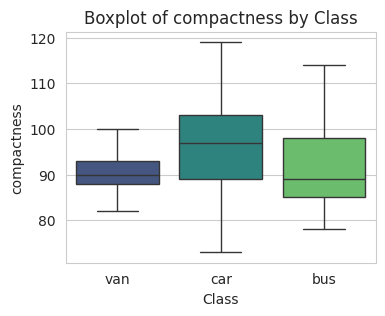

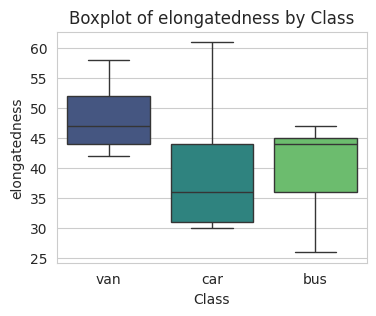

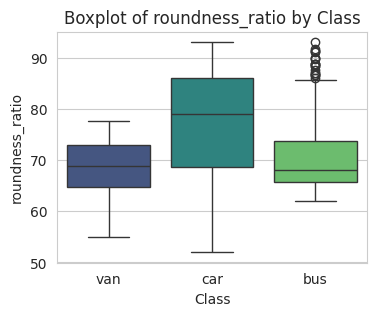

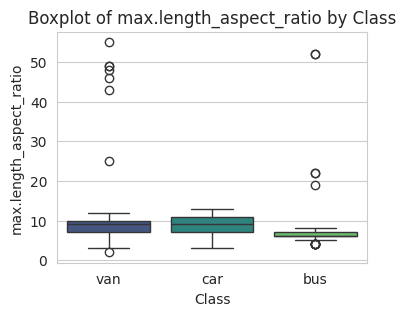

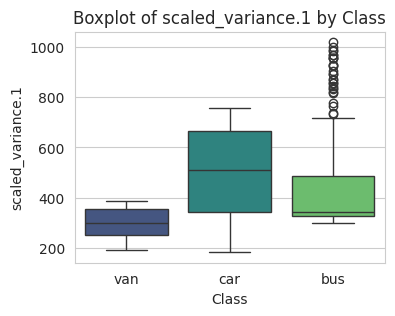

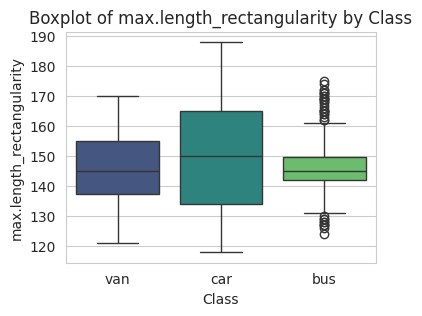

In [ ]:
features = df_vehicle_cleaned[['compactness', 'elongatedness', 'roundness_ratio', 'max.length_aspect_ratio', 'scaled_variance.1', 'max.length_rectangularity']]

for col in features:
  y_values = df_vehicle[col]
  x_values = df_vehicle['class']
  plt.figure(figsize=(4, 3))
  sns.boxplot(x=x_values, y=y_values, hue=x_values, palette='viridis')
  plt.xlabel('Class')
  plt.ylabel(col)
  plt.title(f'Boxplot of {col} by Class')


<Figure size 1500x1000 with 0 Axes>

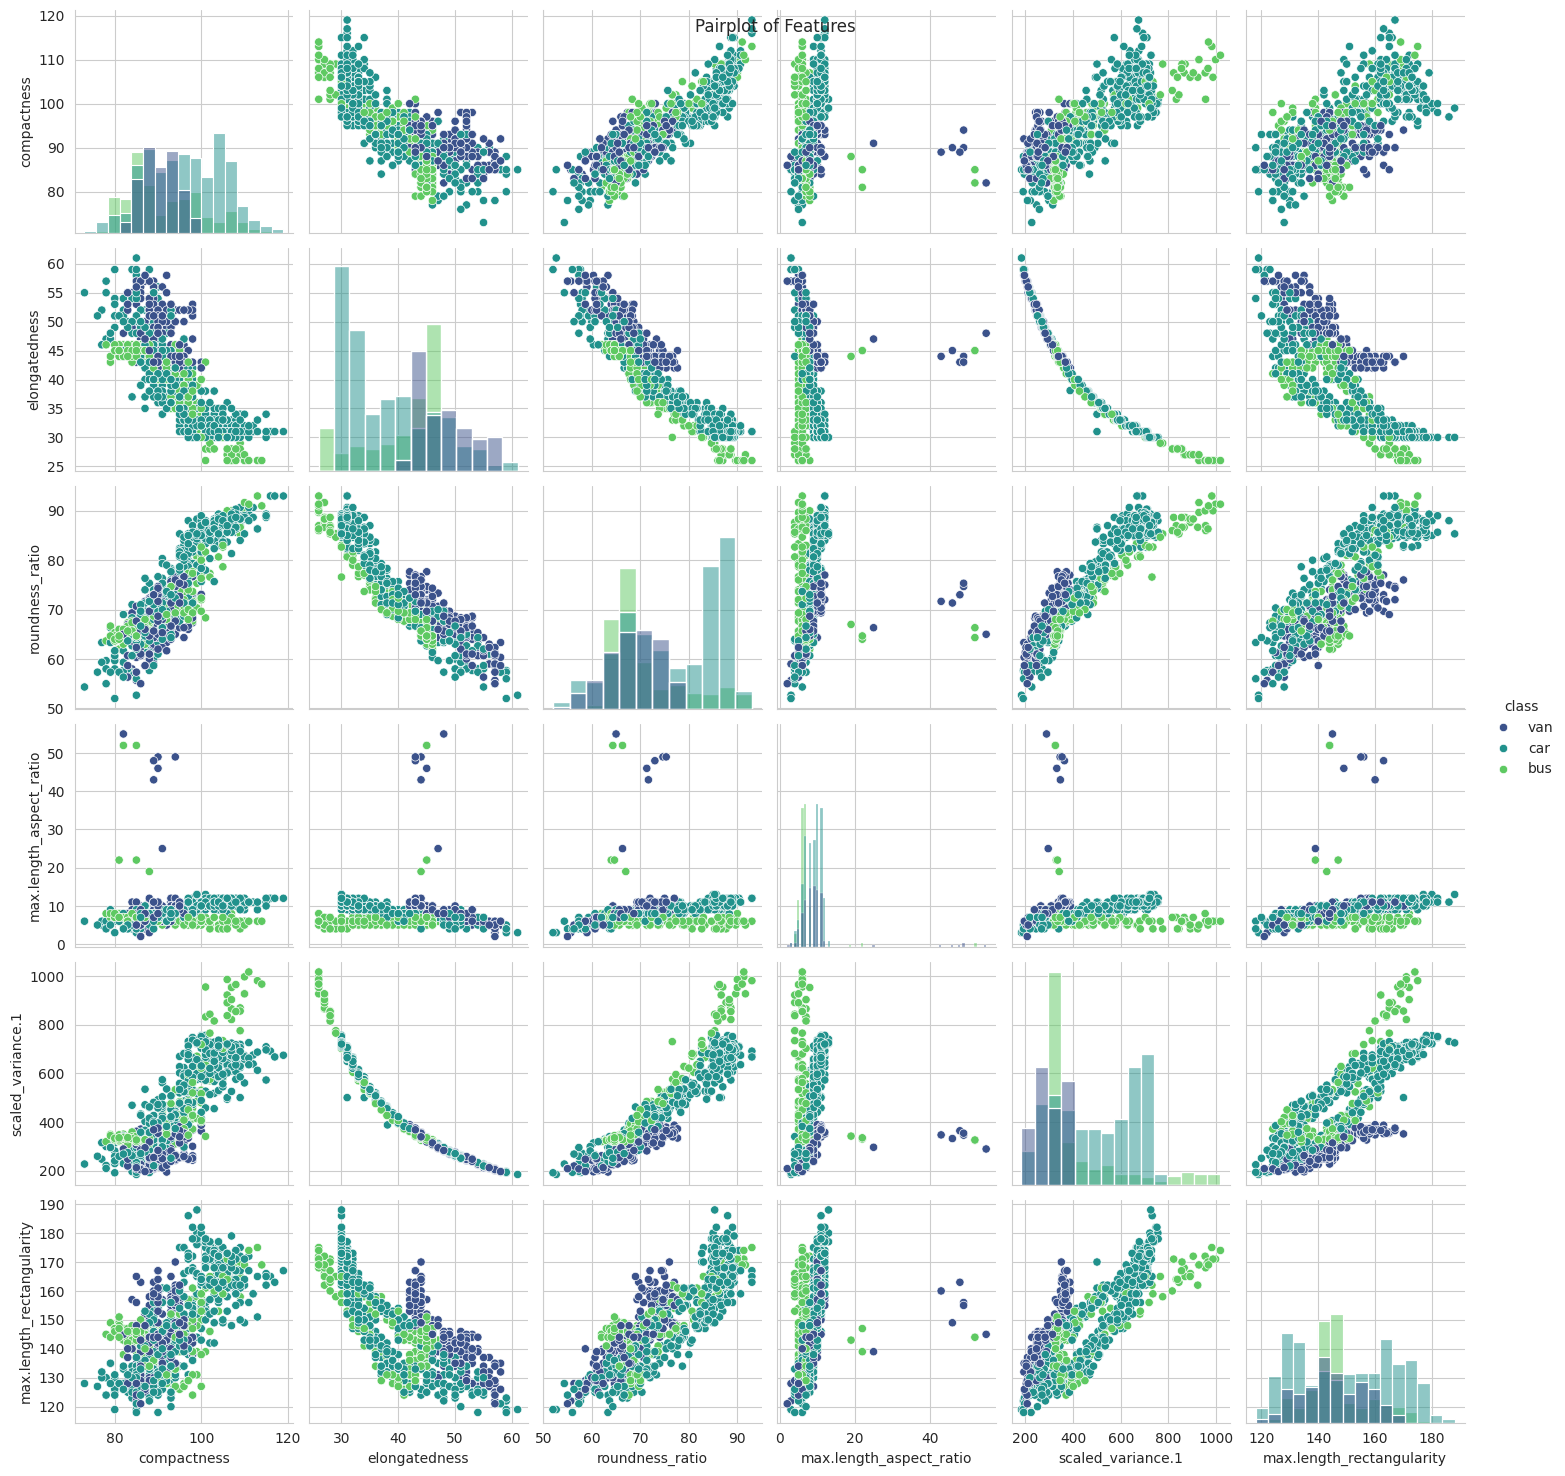

In [ ]:
features = df_vehicle_cleaned[['compactness', 'elongatedness', 'roundness_ratio', 'max.length_aspect_ratio', 'scaled_variance.1', 'max.length_rectangularity', 'class']]
plt.figure(figsize=(15, 10))
sns.pairplot(features, hue='class', diag_kind='hist', palette='viridis')
plt.suptitle('Pairplot of Features')
plt.show()

#Machine Learning Model

##Train and Test Data Split


- Target = class
- Split Data 80% Train / 20% Test
- used original uncleaned data to stop data leakage and will handle the nulls after the split
- Used random_state to keep the results easily reproducable and consistnet
- Used stratify to make sure there was en even distribution of the target in the tests.

In [ ]:
X = df_vehicle.drop('class', axis=1) # Features (Independent Variables)
y = df_vehicle['class'] #Target (Dependent Variable)

#20% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(676, 22) (170, 22) (676,) (170,)


Handling nulls for Train and Test segments

In [ ]:
imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)  # Learn from training data
X_test = imputer.transform(X_test)        # Apply same transformation to test

print(f"Number of nulls X_train: {np.isnan(X_train).sum()}")
print(f"Number of nulls X_test: {np.isnan(X_test).sum()}")

Number of nulls X_train: 0
Number of nulls X_test: 0


###Scaling
Used standard Scaler because there are outliers


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Supervised Classification

Options for Multi-Class Classification models:
- Logistic Regression
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest

##Random Forest
I've chosen this Model because it..
1. Works well with numerical data
2. Handles feature importance
3. Has a good accuracy level
4. Is a small dataset


In [ ]:
# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##Cross Validation

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Cross-Validation Scores:")
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")


Cross-Validation Scores:
Fold 1: Accuracy = 0.9265
Fold 2: Accuracy = 0.9481
Fold 3: Accuracy = 0.9259
Fold 4: Accuracy = 0.9556
Fold 5: Accuracy = 0.9556
Mean Accuracy: 0.9423


##Evaluate Model Metrics

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9588235294117647
Classification Report:
               precision    recall  f1-score   support

         bus       0.93      0.98      0.96        44
         car       0.98      0.94      0.96        86
         van       0.95      0.97      0.96        40

    accuracy                           0.96       170
   macro avg       0.95      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



##Confusion Matrix

Text(70.72222222222221, 0.5, 'Actual')

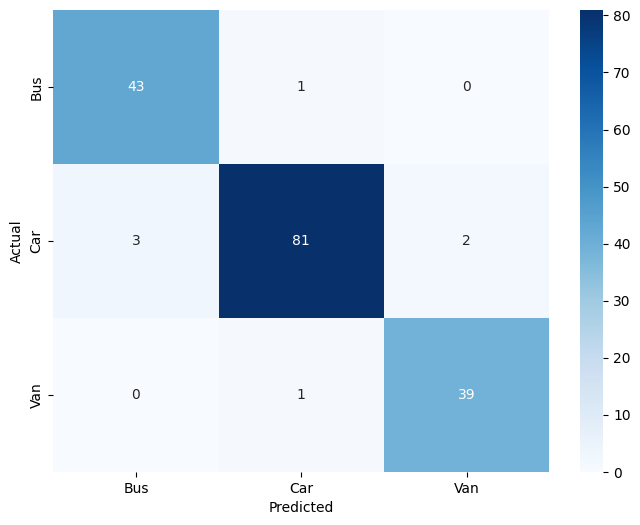

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bus', 'Car', 'Van'], yticklabels=['Bus', 'Car', 'Van'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

##Conclusions



###Findings of the results of the Random Forest Model:

###The Model is ready for use in classification

- Precision and Recall are well-balanced for all classes, meaning the model is not biased toward any particular category.
- F1-scores (~0.95) are consistent, showing that both false positives and false negatives are minimal.
- Support (number of instances per class) is relatively balanced, so accuracy is a reliable metric here.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the findings: {accuracy * 100:.2f}%")

Accuracy of the findings: 95.88%


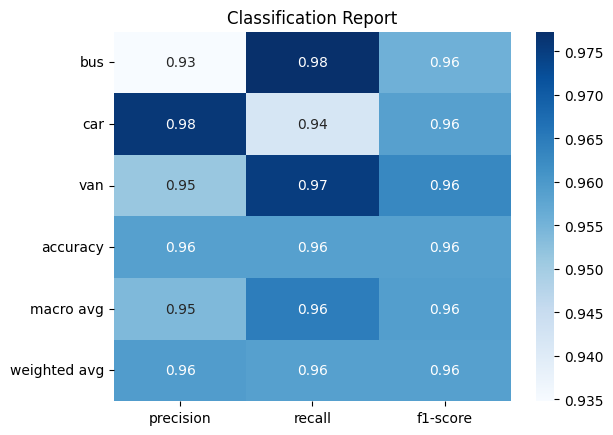

In [ ]:
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

###Showing 10 most important features used in the Algorithm:
I can see from these results that my feature engineering helped the model. Roundness_ratio was in the top 10.

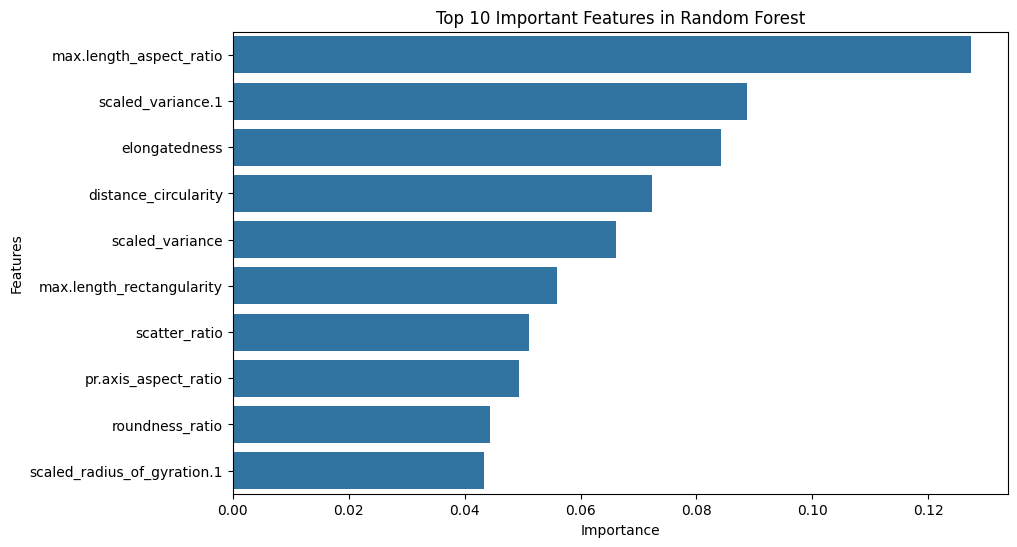

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.nlargest(10), y=feature_importances.nlargest(10).index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

##Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

num_trees = [10, 50, 100, 150, 200]
max_depth = [None, 10, 20, 30, 40, 50]
param_grid = {'n_estimators': num_trees, 'max_depth': max_depth}

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)




Best Parameters: {'max_depth': None, 'n_estimators': 150}
Best Accuracy: 0.9556209150326798


In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9647058823529412
Classification Report:
               precision    recall  f1-score   support

         bus       0.94      1.00      0.97        44
         car       0.99      0.94      0.96        86
         van       0.95      0.97      0.96        40

    accuracy                           0.96       170
   macro avg       0.96      0.97      0.96       170
weighted avg       0.97      0.96      0.96       170



Text(70.72222222222221, 0.5, 'Actual')

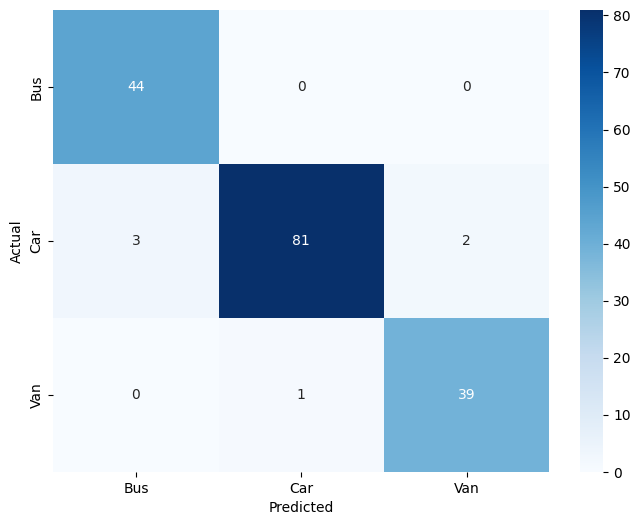

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bus', 'Car', 'Van'], yticklabels=['Bus', 'Car', 'Van'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

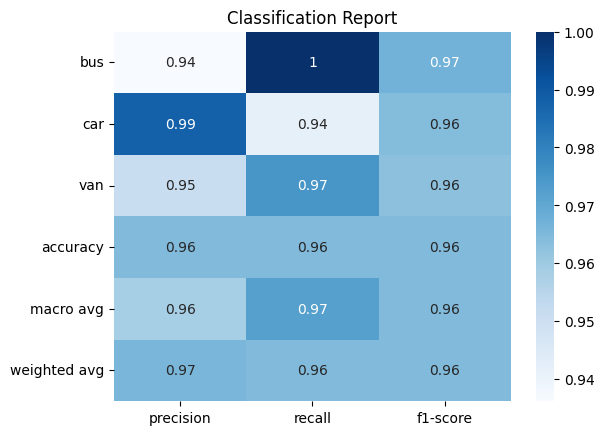

In [ ]:
# Classification Report
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

#Final Conclusion:
The hypertuning parameters have improved the model even further.

The hypertuned model has excellent performance, with an accuracy of 96.5% and strong precision, recall, and F1-scores across all vehicle classes.

Key Observations:
- High Overall Performance: The model generalizes well with a 96%+ accuracy.
- Bus Classification is Perfect (Recall = 1.00): No buses were misclassified.
- Car Misclassifications: 3 cars were classified as buses and 2 cars were classified as vans.
This suggests a size-related overlap, where some large cars share feature similarities with vans or buses.